**Which industry in the organization has the highest renewal rate?**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
subscription_df = pd.read_csv('../data/subscription_information.csv')

In [3]:
subscription_df

,client_id,subscription_type,start_date,end_date,renewed
0,1131383004,Yearly,2020-11-11,2021-11-11,False
1,4309371709,Monthly,2021-05-24,2021-06-23,True
2,3183675157,Yearly,2021-12-25,2022-12-25,True
3,5371694837,Monthly,2020-03-14,2020-04-13,True
4,5157113076,Monthly,2019-11-07,2019-12-07,False
...,...,...,...,...,...
95,4519356806,Monthly,2018-03-04,2018-04-03,True
96,9714663815,Monthly,2020-11-11,2020-12-11,True
97,9598980006,Monthly,2019-06-16,2019-07-16,True
98,3157098196,Monthly,2021-11-11,2021-12-11,True


In [4]:
subscription_df.count()

client_id            100
subscription_type    100
start_date           100
end_date             100
renewed              100
dtype: int64

In [5]:
subscription_df['client_id'].nunique()

100

In [6]:
client_details_df = pd.read_csv('../data/industry_client_details.csv')

In [7]:
client_details_df

,client_id,company_size,industry,location
0,4280387012,Large,Finance Lending,Mumbai
1,2095513148,Small,Finance Lending,Chennai
2,7225516707,Medium,Finance Lending,New Delhi
3,8093537819,Large,Block Chain,Mumbai
4,4387541014,Medium,Hyper Local,Banglore
...,...,...,...,...
95,9159056053,Medium,Gaming,New Delhi
96,1077708772,Small,Block Chain,Mumbai
97,4361672518,Small,AI,New Delhi
98,6751372012,Large,Hyper Local,Mumbai


Joining subscription dataframe with client details dataframe to obtain the industry information of the client

In [8]:
subscription_merged_df = subscription_df.merge(client_details_df, how = 'left', on = 'client_id')

In [9]:
subscription_merged_df

,client_id,subscription_type,start_date,end_date,renewed,company_size,industry,location
0,1131383004,Yearly,2020-11-11,2021-11-11,False,Large,Finance Lending,Banglore
1,4309371709,Monthly,2021-05-24,2021-06-23,True,Large,Hyper Local,Hyderabad
2,3183675157,Yearly,2021-12-25,2022-12-25,True,Small,Gaming,Chennai
3,5371694837,Monthly,2020-03-14,2020-04-13,True,Large,AI,New Delhi
4,5157113076,Monthly,2019-11-07,2019-12-07,False,Medium,Gaming,Banglore
...,...,...,...,...,...,...,...,...
95,4519356806,Monthly,2018-03-04,2018-04-03,True,Small,Gaming,Banglore
96,9714663815,Monthly,2020-11-11,2020-12-11,True,Small,AI,New Delhi
97,9598980006,Monthly,2019-06-16,2019-07-16,True,Medium,AI,New Delhi
98,3157098196,Monthly,2021-11-11,2021-12-11,True,Small,AI,Banglore


Calculating renewal_rate per industry

In [10]:
subscription_grouped_df = subscription_merged_df.groupby('industry').agg(
    total_customers = ('client_id', 'count'),
    renewals = ('renewed', 'sum')
).reset_index()

In [11]:
subscription_grouped_df

,industry,total_customers,renewals
0,AI,11,7
1,Block Chain,25,11
2,Finance Lending,22,12
3,Gaming,22,16
4,Hyper Local,20,9


In [12]:
subscription_grouped_df['renewal_rate'] = (subscription_grouped_df['renewals']/subscription_grouped_df['total_customers'])*100

In [13]:
subscription_grouped_df

,industry,total_customers,renewals,renewal_rate
0,AI,11,7,63.636364
1,Block Chain,25,11,44.000000
2,Finance Lending,22,12,54.545455
3,Gaming,22,16,72.727273
4,Hyper Local,20,9,45.000000


In [14]:
subscription_grouped_df['renewal_rate'] = subscription_grouped_df['renewal_rate'].apply(lambda rate: round(rate, 2))

In [15]:
subscription_grouped_df

,industry,total_customers,renewals,renewal_rate
0,AI,11,7,63.64
1,Block Chain,25,11,44.00
2,Finance Lending,22,12,54.55
3,Gaming,22,16,72.73
4,Hyper Local,20,9,45.00


In [16]:
subscription_grouped_df = subscription_grouped_df[['industry', 'renewal_rate']]

In [17]:
subscription_grouped_df.columns = ['Industry Name', 'Renewal Rate']

In [18]:
subscription_grouped_df

,Industry Name,Renewal Rate
0,AI,63.64
1,Block Chain,44.00
2,Finance Lending,54.55
3,Gaming,72.73
4,Hyper Local,45.00


In [19]:
result_renewal_df = subscription_grouped_df.sort_values(by=['Renewal Rate'], ascending=False)

In [20]:
result_renewal_df.reset_index(drop=True, inplace=True)

In [21]:
result_renewal_df

,Industry Name,Renewal Rate
0,Gaming,72.73
1,AI,63.64
2,Finance Lending,54.55
3,Hyper Local,45.00
4,Block Chain,44.00


In [22]:
result_renewal_df.to_csv('result_renewal_rate_per_industry.csv', index=False)

According to the above calculation, we can infer that **Gaming** as industry has the highest renewal rate.

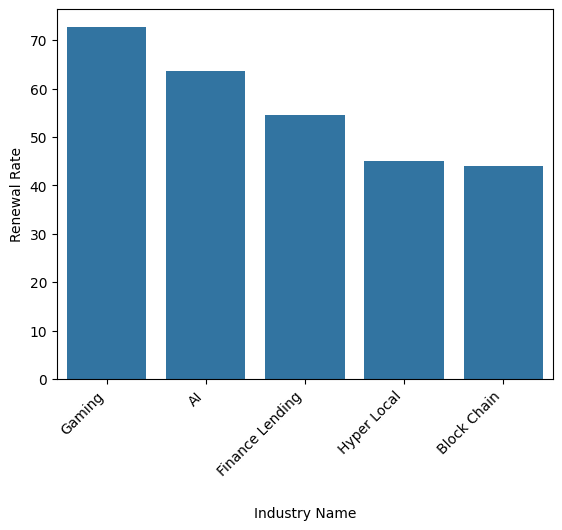

In [23]:
sns.barplot(result_renewal_df, x = 'Industry Name', y = 'Renewal Rate')
plt.xlabel('Industry Name', labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.savefig('Renewal rate per industry.png', dpi=300)
plt.show()